In [1]:
%matplotlib inline
import math
import numpy as np
from matplotlib import pyplot as plt

# Homework

0) Finish the implementation of false positon method. Use it to find the solution for $\sin(x) + 1 = x$ do it 20 times.

1.93456321075


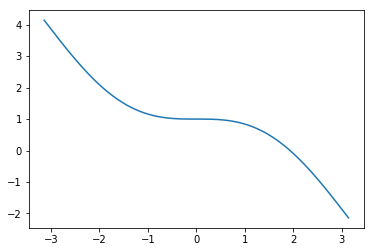

In [2]:
def f(x):
    return math.sin(x) - x + 1

def false_position(left,right,n):
    for i in range(n):
        x_int = (left*f(right) - right*f(left))/(f(right)-f(left))
        if f(x_int) < 0:
            left = x_int
        else:
            right = x_int
    return x_int

print false_position(0,2,20)
xs = np.linspace(-math.pi,math.pi,1000)
ys = [f(x) for x in xs]
plt.plot(xs,ys)

1) Give me the solution to $x = e^{-x}$ that is $10^{-6}$ using bisection method.

Pick the initial bound from the following and explain why you can't pick the other one.
Bound A: (-1,0), Bound B (0,1)

0.567143440247
the x intercept is between 0 and 1, so B


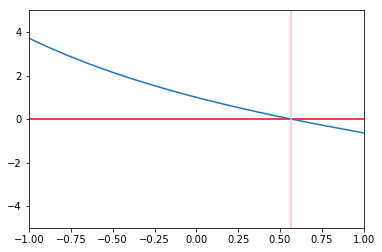

In [3]:
xs = np.linspace(-5, 5, 100)
ys = np.e**(-xs) - xs
plt.axhline(0, c='r')
plt.xlim(-1, 1)
plt.ylim(-5, 5)
plt.plot(xs,ys)

def f(x):
    return np.e**(-x) - x
def findXintercept(fm, to, limit = 1e-6):
    guess = (fm+to)/2.
    #check if x-intercept is close to 0
    if (abs(f(guess)) <= limit):
        return guess
    else:
        if (f(guess) <= 0 ):
            return findXintercept(fm, guess) 
        else: 
            return findXintercept(guess, to)

ans = findXintercept(0, 1,1e-6)
plt.axvline(ans, c='pink')
print ans

print "the x intercept is between 0 and 1, so B"

2) Find all value of $x \in [0,1]$ such that $f(x)=0$ for

$f(x) = -0.000216747 + 0.0072868 x - 0.0977383 x^2 + 0.664685 x^3 - 
 2.40773 x^4 + 4.46766 x^5 - 3.7091 x^6 + x^7$
 
Make sure your answers are at most $10^{-6}$ away from the real solution.

In [4]:
def f(x):
    return -0.000216747 + 0.0072868*x - 0.0977383*x**2 + 0.664685*x**3 - \
            2.40773*x**4 + 4.46766*x**5 - 3.7091*x**6 + x**7


(-1e-05, 1e-05)

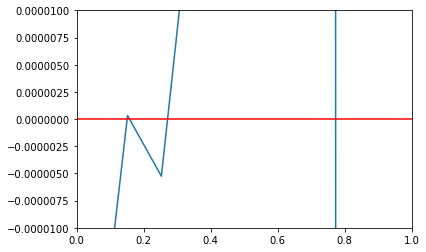

In [5]:
plt.plot(xs, f(xs))
plt.axhline(0, c = 'r')
plt.xlim(0, 1)
plt.ylim(-1e-5, 1e-5)


DOING IT BY SCANNING:
0.122622622623
0.21971971972
0.332832832833
0.78541041041
DOING IT BY GRAPHING and Bisection:
0.065
0.18
0.375
0.65
[0.065, 0.18, 0.375, 0.65]


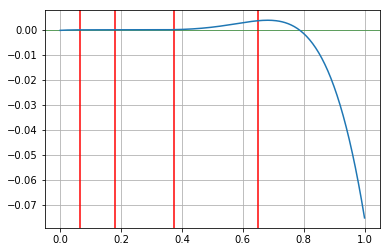

In [30]:
def f(x):
    return -0.000216747 + 0.0072868*x - 0.0977383*x**2 + 0.664685*x**3 - \
            2.40773*x**4 + 4.46766*x**5 - 3.7091*x**6 + x**7
def bisection(f,fm,to,n):
    fm = float(fm)
    to = float(to)
    c = (fm+to)/2 
    
    if (fm-to < 1e-6):
        return c
    
    if f(fm)*f(c) < 0:
        bisection(f,fm,c,n)
    else:
        bisection(f,c,to,n)
    
print "DOING IT BY SCANNING:"   
def scan(f,xs):
    for i in range(len(xs)-2):
        if (f(xs[i]) > 0 and f(xs[i+1]) < 0 ) or ((f(xs[i]) < 0 and f(xs[i+1]) > 0) ):
            print findXintercept(xs[i],xs[i+1])
xs = np.linspace(0,1,1000)
scan(f,xs)

       
print "DOING IT BY GRAPHING and Bisection:"
root1 = bisection(f,0, 0.13,17)
root2= bisection(f,0.13, 0.23,17)
root3 = bisection(f,0.3, 0.45,17)
root4 = bisection(f,0.5, 0.8,17)

print (root1)
print (root2)
print (root3)
print (root4)

roots = [root1,root2,root3,root4]
print roots
ms = np.linspace(0,1,300)
ns = [f(i) for i in ms]
plt.axvline(root1,color="red")
plt.axvline(root2,color="red")
plt.axvline(root3,color="red")
plt.axvline(root4,color="red")
plt.grid(True)
plt.axhline(0,color="green",lw=0.5)
plt.plot(ms,ns)

2.1) Find all the local minima and maxima of the above function. How do you figure out whether it is a local maximum or local minimum

(-1e-07, 1e-07)

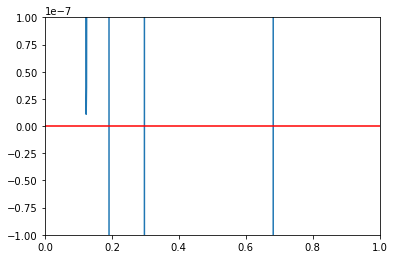

In [31]:
def f(x):
    return -0.000216747 + 0.0072868*x - 0.0977383*x**2 + 0.664685*x**3 - \
            2.40773*x**4 + 4.46766*x**5 - 3.7091*x**6 + x**7
def df1(x):
    return  0.0072868 - 2*0.0977383*x + 3*0.664685*x**2 - \
            4*2.40773*x**3 + 5*4.46766*x**4 - 6*3.7091*x**5 + 7*x**6
def df2(x):
    return -0.195477 + 3.9812*x - 28.8928*(x**2) + 89.3532*(x**3) - 111.273*x**4 + 42*x**5
    
plt.plot(xs, df1(xs))
plt.axhline(0, c = 'r')
plt.xlim(0, 1)
plt.ylim(-1e-7, 1e-7)

In [37]:
def bisection(f,fm,to):
    fm = float(fm)
    to = float(to)
    c = (fm+to)/2 
    
    if (fm-to < 1e-7):
        return c
    
    if f(fm)*f(c) < 0:
        bisection(f,fm,c,n)
    else:
        bisection(f,c,to,n)
        
def findInt_wrapper(cal, lim):
    def findInt(fm, to):
        mid = (fm + to)/2.
        while (not np.abs(cal(mid)) <= lim):
            if cal(fm) * cal(mid) < 0:
                to = mid
            else:
                fm = mid
            mid = (fm + to)/2.
            if (fm == to): return None
        return mid
    return findInt
findInt = findInt_wrapper(df1, 1e-7)        
        

print "DOING IT BY LOOKING AT GRAPH"
x2 = findInt(0.1, 0.2)
x3 = findInt(0.23, 0.4)
x4 = findInt(0.6, 0.8)

x_ints = [x2, x3, x4]
print x_ints




DOING IT BY LOOKING AT GRAPH
[0.191357421875, 0.29709106445312494, 0.6817806243896483]


2.2) What is the `global maximum` and `global minimum` of the function above within the range $x\in[0,1]$

In [38]:
def check_m(second_derivative,root):
    if second_derivative(root) < 0:
        print root, "LOCAL MAXIMA"
    else:
        print root, "LOCAL MINIMA"

check_m(df2,x2)
check_m(df2,x3)
check_m(df2,x4)

0.191357421875 LOCAL MAXIMA
0.297091064453 LOCAL MINIMA
0.68178062439 LOCAL MAXIMA


3) In quantum physics, when finding a bound state for a finite potential well one would end up with the following equation(Yes E is negative):

$$
\sqrt{\frac{-E}{E+V_0}} = \tan \sqrt{2m \frac{E+V_0}{\hbar^2} a}
$$

The goal is to find all Energy($E$) that satisfy this equation.
For simplicity, let
- $V_0 = 1$
- $m = 1$
- $a = 1$
- $\hbar = 1$(Yes this is called natural unit)

$$
    \sqrt{\frac{-E}{E+1}} = \tan \sqrt{2(E+1)}
$$

Find the value for $E\in (-1.0, 0)$ which satisfy the equation above). Make sure you accuracy is $<\pm10^{-4}$


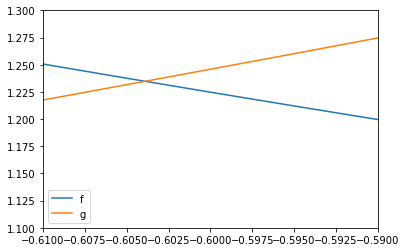

In [39]:
def f(x):
    return math.sqrt(-x/(x+1))
def g(x):
    return math.tan(math.sqrt(2*(x+1)))
def cal(x):
    return f(x) - g(x)

xs = np.linspace(-0.999,-0.001,10**4)
ys = [f(x) for x in xs]
gs = [g(x) for x in xs]

plt.plot(xs,ys,label = "f")
plt.plot(xs,gs,label = "g")
plt.ylim(1.1,1.3)
plt.xlim(-0.61,-0.59)
plt.legend()



In [42]:
def bisection(f,fm, to):
    guess = (fm+to)/2.
    if (abs(f(guess)) <= 1e-4):
        return guess
    else:
        if (f(guess) <= 0 and f(fm)): #>= 0or  f(guess) <= 0 and f(fm) >= 0):
            return bisection(f,fm, guess) 
        else: 
            return bisection(f,guess,to)
bisection(cal,-0.9,-0.1)




-0.6039062499999999

4) Ply quit programming and decide to be a Apple(fruit) shop owner. He bought 1000 apples everyday and try to sell it. The probability $k$ customer want Ply's apple(one each) is given by Poisson distribution:

$$
    P(k; \lambda) = \frac{\lambda^k \exp(-\lambda)}{k!}
$$

Where $\lambda$ is an parameter that represent the mean of number of people that want Ply's apple each day.

After selling apples for 2000 days Ply found that his 1000 apples a day are sold out 600 days out of 2000 days.

The goal for this problem is to figure out how he should change the number of apples he bought in a day.

- In case you are curious https://en.wikipedia.org/wiki/Poisson_distribution. The true distribution of this selling apple process should be binomial distribution but with large enough customer and low enough probability of an individual buying an apple 

4.1) You may find that if you try to code poisson distribution directly. It will not work with large number.
$$
    P(k; \lambda) = \frac{\lambda^k \exp(-\lambda)}{k!}
$$

Explain briefly why python complains

In [43]:
import math
def bad_poisson(lmd, k):
    return pow(lmd,k)*math.exp(-lmd)/math.factorial(k)
# bad_poisson(1000,1000) 1000 to the power of a 1000 is too large for python to handle.

4.2) A very useful trick to avoid this problem is to take log and exponentiate. That is

$$
    P(k; \lambda) = \exp\left( \ln \left[ \frac{\lambda^k \exp(-\lambda)}{k!} \right] \right)
$$

First, show that
$$
    \ln(P(k; \lambda)) = (\ldots \ln(\ldots)-\ldots)-\ln(k!)
$$



$$ ln(P(k;\lambda)) = ln (\frac{\lambda^k \exp(-\lambda)}{k!})\\
                = ln (\lambda^k \exp(-\lambda)) - ln(k!)\\
                = ln (\lambda^k) + ln (\exp(-\lambda)) - ln(k!) \\
                = kln(\lambda) - \lambda - ln(k!)
$$

4.3) $\ln(k!)$ shows up everywhere in math. So most math library have `lgamma` function to compute this very fast.
For example,

`math.lgamma(5) == math.log(math.factorial(4))`

Your job for this problem is to implement $P(k; \lambda)$ using log-exp trick.

If you do it right, $P(k=1000; \mu=1000) \approx 0.0126146$

In [44]:

def P(k,lmd):
    return math.exp(k*math.log(lmd) - lmd - math.lgamma((k+1)))




In [45]:
k = 1000
u = 1000

print P(1000,1000)

0.0126146113487


4.4) Now here is the fun part. Suppose that $\lambda = 987.6$(this is not true). Find the probability that Ply will sell all his 1000 apples. (Remember if 2000 people want Ply's apple, he his apple will also be sold out). 

And No, summing up to infinity is not practical.

In [46]:
def findExpected(nApples,lmd):
    summ = 0
    for i in range(0,nApples):
        summ += P(i,lmd)
    return 1 - summ  #1 - prob that he will not sell all his apples

findExpected(1000,987.6)


        

0.3507846581670552

4.5) Recall the information that

After selling apples for 2000 days Ply found that his 1000 apples a day are sold out 600 days out of 2000 days.

Find the value for $\lambda$ to a decent accuracy($<\pm 0.1$)

983.08308308308312

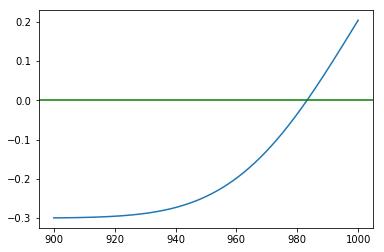

In [47]:
ansToPos = 600/float(2000)

def findLambda(lmd):
    nApples= 1000
    summ = 0
    for k in range(0,nApples):
        summ += P(k,lmd)
    return 1 - summ - ansToPos


xs = np.linspace(900,1000,1000)
ys = [findLambda(x) for x in xs]
plt.plot(xs,ys)
plt.axhline(0, color='green')

def findXintercept():
    for i in range(len(ys)):
        if ys[i] < 0 and ys[1 + i] > 0:
            return xs[i]
lmd = findXintercept()
lmd

4.6) Using $\lambda$ you found in 4.5).

Ply bounght apple for 20 Baht each and he sell it for 50 Baht each. Which means that for each apple he sells he make a profit of 30 baht. But, at the end of each day Ply has to trash all unsold Apples(taking a loss of 20 Baht each).

If Ply bought 1000 apples a day, what would be his expected profit(remember expected value from discrete math/stat/quantum?).

In [48]:


def calcProfit(appSold, n):
    thrashed = (n-appSold)
    return appSold*30 - thrashed*20

#The summ is up to a thousand in expected value Prob(i, givenLmdb)*profit(i)
#plus the probabilty that more than or equal to a 1000 people needs it, however we calculate profit to of 1000
#beacause u can not sell more than the apples bought which a 1000
def expected(n, lmd):
    summ= 0
    for i in range(int(n)):
        summ += P(i,lmd)*calcProfit(i, n) #i apples sold  * the profit if i apples are sold
    return summ + findExpected(n,lmd)*calcProfit(n, n) #1-1000 apples + the days more than 1000 want to buy apples
lmd = findXintercept()
expected(1000,lmd)
    


    
    

    

28861.26588628922

4.7) Using $\lambda$ you found in 4.5) Find the number of apple Ply should buy in a day to maximize his expected profit.

In [49]:
ys = [expected(i,lmd) for i in range(2000)]
np.argmax(ys)

991

5) Full Width at Half Maximum(FWHM). Distribution width is a very important quantity. It tells you how wide a the distribution is. One way to do that is to use a quantity called full-width half max.

This is the width of the distribution at half maximum. 

For example for distribution shown below the maximum is at x=0.0 and y=1.0

The maximum of this distribution is 1.0. So we are interested in the width of the distribution when the value of the distribution is 1.0/2=0.5

The width of the distribution is shown in black line. In this case it's about 2.35

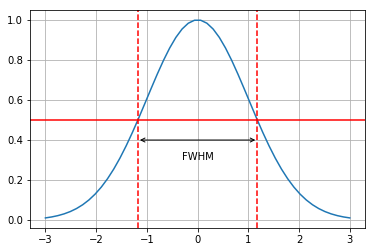

In [50]:
import math
def demo(x):
    return math.exp(-x**2/2.0)
x = np.linspace(-3,3)
y = [demo(xx) for xx in x]
plt.plot(x,y)
plt.axhline(0.5, color='red')

plt.axvline(2.355/2,color='red',linestyle='dashed')
plt.axvline(-2.355/2,color='red',linestyle='dashed')

plt.grid()
plt.annotate(
    '', xy=(-2.355/2, 0.4), xycoords='data',
    xytext=(2.355/2, 0.4), textcoords='data',
    arrowprops={'arrowstyle': '<->'})
plt.text(0,0.3,'FWHM',horizontalalignment ='center')



5.1)Find FWHM of the following function. Make sure the bound on error of the FWHM is less than $10^{-4}$.

[-0.75507550755075492, 5.4435443544354438, 5.4455445544554451]


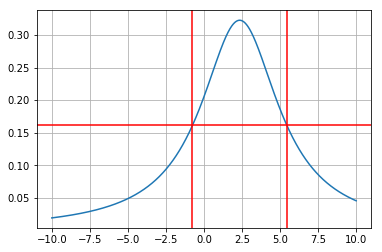

In [51]:
import math
def f(x, gamma=3.1):
    mu = 2.345
    return gamma/((x-mu)**2+gamma**2)

x = np.linspace(-10,10,10000)
y = [f(xx) for xx in x]
plt.plot(x,y)
halfMax = max(y)/2.
plt.grid()

xs = []
for i in range(len(y)):
    if abs(y[i] - halfMax) <= 1e-4:
        xs.append(x[i])
width = xs[-1] - abs(xs[0])

width



print xs
plt.axvline(xs[0],color = "red")
plt.axvline(xs[-1],color = "red")
plt.axhline(halfMax,color = "red")


left:  0.31689453125
right:  4.375
size of gap:  4.05810546875


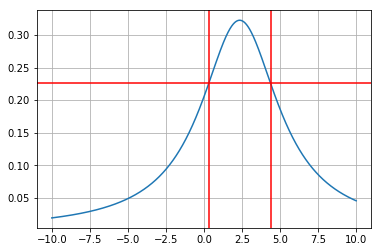

In [52]:
import math
def f(x, gamma=3.1):
    mu = 2.345
    return gamma/((x-mu)**2+gamma**2)

x = np.linspace(-10,10,10000)
y = [f(xx) for xx in x]
plt.plot(x,y)
halfMax = max(y)* (0.7)
plt.grid()

def calc(x):
    return f(x) - halfMax
def bisection(f,fm,to,lim):
    m = (fm+to)/2.
    check = math.fabs(f(m) - halfMax )
    if ( check  <= lim ):
        return m
    else:
        if ( calc(fm) * calc(m) > 0):
            return bisection(f,m,to,lim)
        else:
            return bisection(f,fm,m,lim)

left = bisection(f,-7,2,1e-4)
right = bisection(f,4,6,1e-4)
plt.axvline(left,color = "red")
plt.axvline(right,color = "red")
plt.axhline(halfMax,color = "red")
print "left: " , left
print "right: " ,right
print "size of gap: ", right-left


5.2) Plot FWHM(y-axis) as a function of $\gamma$(gamma) from $\gamma=0.5\ldots 3$. Make sure you have at least 30 points.

0.108165114047


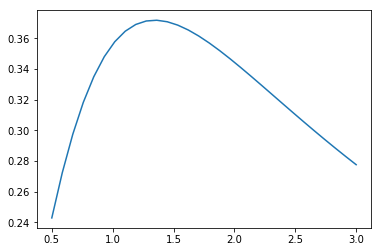

In [53]:

print(f(1.0, gamma=0.2)) # you may find this useful
gs= np.linspace(0.5,3,30)
gys = [f(1.0,gamma) for gamma in gs]
plt.plot(gs,gys)


5.3) (Optional) Prove the relation you found in 5.2)